<a href="https://colab.research.google.com/github/Gustavo-Melo-dev/AnalyzingCriminalDataBrazilianStates/blob/main/Machine_Learning_Brazilian_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

base = pd.read_excel("/content/drive/MyDrive/MachineLearning/indicadoressegurancapublicauf.xlsx", sheet_name="Ocorrências")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Faz a remoção dos dados que correspondem ao ano de 2021, deixando assim a base mais balanceada e levando em consideração que é o único ano que não possui informações de todos os meses.

base = base.drop(base[base['Ano'] == 2021].index)
base.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
1652,Acre,Estupro,2020,janeiro,18
1653,Acre,Furto de veículo,2020,janeiro,23
1654,Acre,Homicídio doloso,2020,janeiro,46
1655,Acre,Lesão corporal seguida de morte,2020,janeiro,0
1656,Acre,Roubo a instituição financeira,2020,janeiro,0


In [ ]:
# Agrupando os dados para obter somente os Anos e os Estados, com a intenção de alinhar os estados em cada ano correspondente.

groupAnoUf = base.groupby(['Ano', 'UF'])['Ocorrências'].sum()

baseSPEstados = pd.DataFrame()

colunaAno = pd.Series([])
colunaUf = pd.Series([])

row = 0

for index, value in groupAnoUf.iteritems():
  colunaAno[row] = index[0]
  colunaUf[row] = index[1]
  row += 1

baseSPEstados['Ano'] = colunaAno
baseSPEstados['UF'] = colunaUf

In [ ]:
# Contabilizando o número total de cada crime de cada estado em cada ano.

columns=['Ano', 'UF', 'Estupro', 'Furto de veículo', 'Homicídio doloso', 'Lesão corporal seguida de morte', 'Roubo a instituição financeira', 'Roubo de carga', 'Roubo de veículo', 'Roubo seguido de morte (latrocínio)', 'Tentativa de homicídio']
baseSPEstados = pd.DataFrame(baseSPEstados, columns=columns)

groupTiposCrimes = base.groupby(['Ano', 'UF', 'Tipo Crime'])['Ocorrências'].sum()
groupTiposCrimes

row = -1
uf = 'uf'

for index, total in groupTiposCrimes.iteritems():
  if(index[1] != uf):
    row += 1
    uf = index[1]

  if(baseSPEstados['Ano'][row] == index[0] and baseSPEstados['UF'][row] == index[1]):
    baseSPEstados[index[2]][row] = total

baseSPEstados.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ano,UF,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
0,2015,Acre,42.0,0.0,189.0,3.0,0.0,0.0,0.0,10.0,16.0
1,2015,Alagoas,567.0,696.0,1633.0,9.0,21.0,95.0,3158.0,56.0,704.0
2,2015,Amapá,354.0,877.0,248.0,2.0,2.0,NaN,310.0,17.0,315.0
3,2015,Amazonas,756.0,1867.0,1313.0,8.0,52.0,0.0,2781.0,69.0,394.0
4,2015,Bahia,2450.0,5539.0,5422.0,125.0,60.0,436.0,14451.0,204.0,2844.0
5,2015,Ceará,1454.0,4839.0,3787.0,30.0,60.0,212.0,9411.0,64.0,1629.0
6,2015,Distrito Federal,625.0,6500.0,614.0,6.0,8.0,31.0,4807.0,45.0,676.0
7,2015,Espírito Santo,404.0,3075.0,1392.0,16.0,12.0,28.0,2960.0,37.0,2633.0
8,2015,Goiás,535.0,12008.0,2729.0,23.0,87.0,452.0,9554.0,89.0,2507.0
9,2015,Maranhão,952.0,2240.0,2006.0,67.0,152.0,48.0,4065.0,117.0,1197.0


In [ ]:
# Atribuindo o valor 0 (zero) nos campos que não possuem informações.

baseSPEstados = baseSPEstados.fillna(0)

**Visualização dos Dados com Gráficos**

In [ ]:
import seaborn as sns
from sklearn import preprocessing

In [ ]:
# Fazendo a seleção das colunas com os dados que serão trabalhados. Somente as colunas que correspondem aos crimes de Roubo/Furto, é que serão utilizadas.

baseSPEstados = pd.DataFrame(baseSPEstados, columns=['Ano', 'UF', 'Região', 'Furto de veículo', 'Roubo a instituição financeira', 'Roubo de carga', 'Roubo de veículo', 'Roubo seguido de morte (latrocínio)'])

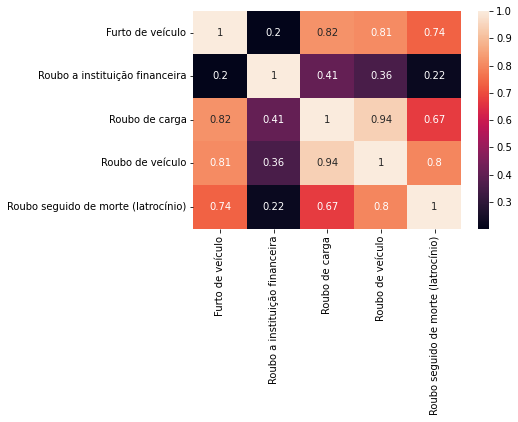

In [ ]:
columns = ['Furto de veículo', 'Roubo a instituição financeira', 'Roubo de carga', 'Roubo de veículo', 'Roubo seguido de morte (latrocínio)']

ano = 2015
ano = 2016
ano = 2017
ano = 2018
ano = 2019
ano = 2020
  
corr_baseSPEstados = baseSPEstados[baseSPEstados['Ano'] == ano]
corr_baseSPEstados = corr_baseSPEstados[columns].corr()
sns.heatmap(corr_baseSPEstados, xticklabels=columns, yticklabels=columns, annot=True)


In [ ]:
# Normalizando os dados para que todos fiquem dentro da mesma escala de valores

columns = ['Furto de veículo', 'Roubo a instituição financeira', 'Roubo de carga', 'Roubo de veículo', 'Roubo seguido de morte (latrocínio)']

baseSPEstados_paraEscala = baseSPEstados[columns].values

min_max_scaler = preprocessing.MinMaxScaler()
baseSPEstados_comEscala = min_max_scaler.fit_transform(baseSPEstados_paraEscala)

baseSPEstados_escala = pd.DataFrame(baseSPEstados_comEscala, index=baseSPEstados.index, columns=columns)
baseSPEstados_escala.head()

baseSPEstados = pd.DataFrame()

baseSPEstados['Ano'] = colunaAno
baseSPEstados['UF'] = colunaUf

baseSPEstados = pd.concat([baseSPEstados, baseSPEstados_escala], axis=1)

In [ ]:
#Adicionando a região que cada estado pertence para melhor avaliação

#Região Norte
baseSPEstados.loc[baseSPEstados['UF'] == 'Acre', 'Região'] = 'NORTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Amapá', 'Região'] = 'NORTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Amazonas', 'Região'] = 'NORTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Pará', 'Região'] = 'NORTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Rondônia', 'Região'] = 'NORTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Roraima', 'Região'] = 'NORTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Tocantins', 'Região'] = 'NORTE'

#Região Nordeste
baseSPEstados.loc[baseSPEstados['UF'] == 'Maranhão', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Piauí', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Ceará', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Rio Grande do Norte', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Pernambuco', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Paraíba', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Sergipe', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Alagoas', 'Região'] = 'NORDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Bahia', 'Região'] = 'NORDESTE'

#Região Centro-Oeste
baseSPEstados.loc[baseSPEstados['UF'] == 'Mato Grosso', 'Região'] = 'CENTRO-OESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Mato Grosso do Sul', 'Região'] = 'CENTRO-OESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Goiás', 'Região'] = 'CENTRO-OESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Distrito Federal', 'Região'] = 'CENTRO-OESTE'

#Região Sudeste
baseSPEstados.loc[baseSPEstados['UF'] == 'Espírito Santo', 'Região'] = 'SUDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'São Paulo', 'Região'] = 'SUDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Minas Gerais', 'Região'] = 'SUDESTE'
baseSPEstados.loc[baseSPEstados['UF'] == 'Rio de Janeiro', 'Região'] = 'SUDESTE'

#Região Sul
baseSPEstados.loc[baseSPEstados['UF'] == 'Paraná', 'Região'] = 'SUL'
baseSPEstados.loc[baseSPEstados['UF'] == 'Santa Catarina', 'Região'] = 'SUL'
baseSPEstados.loc[baseSPEstados['UF'] == 'Rio Grande do Sul', 'Região'] = 'SUL'

baseSPEstados.head(10)

,Ano,UF,Furto de veículo,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Região
0,2015,Acre,0.000000,0.000000,0.000000,0.000000,0.020057,NORTE
1,2015,Alagoas,0.006274,0.132075,0.008963,0.040148,0.151862,NORDESTE
2,2015,Amapá,0.007906,0.012579,0.000000,0.003941,0.040115,NORTE
3,2015,Amazonas,0.016830,0.327044,0.000000,0.035355,0.189112,NORTE
4,2015,Bahia,0.049931,0.377358,0.041136,0.183717,0.575931,NORDESTE
5,2015,Ceará,0.043621,0.377358,0.020002,0.119643,0.174785,NORDESTE
6,2015,Distrito Federal,0.058594,0.050314,0.002925,0.061112,0.120344,CENTRO-OESTE
7,2015,Espírito Santo,0.027720,0.075472,0.002642,0.037631,0.097421,SUDESTE
8,2015,Goiás,0.108246,0.547170,0.042646,0.121461,0.246418,CENTRO-OESTE
9,2015,Maranhão,0.020193,0.955975,0.004529,0.051679,0.326648,NORDESTE


# **Algoritmo**

**K-Means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
columns = ['Furto de veículo', 'Roubo a instituição financeira', 'Roubo de carga', 'Roubo de veículo', 'Roubo seguido de morte (latrocínio)']

for k in range(2, 10):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(baseSPEstados[columns])
  score_mean = metrics.silhouette_score(baseSPEstados[columns], kmeans.labels_, metric='euclidean')
  print(k, score_mean)

2 0.7515403609014013
3 0.5361423693112732
4 0.5442693730431563
5 0.5501577746703735
6 0.5531621848095125
7 0.4374497536235187
8 0.4400708205228288
9 0.4214687747368996


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(baseSPEstados[columns])

KMeans(n_clusters=5)

In [ ]:
clusters = kmeans.labels_.tolist()
clusters_dict = { 'Ano': list(baseSPEstados.Ano), 'UF': baseSPEstados.UF, 'Região': baseSPEstados['Região'], 'cluster': clusters}
baseSPEstados_clusters = pd.DataFrame(clusters_dict, columns = ['cluster','Ano', 'UF', 'Região'])

baseSPEstados_clusters

,cluster,Ano,UF,Região
0,3,2015,Acre,NORTE
1,3,2015,Alagoas,NORDESTE
2,3,2015,Amapá,NORTE
3,0,2015,Amazonas,NORTE
4,4,2015,Bahia,NORDESTE
...,...,...,...,...
157,3,2020,Roraima,NORTE
158,3,2020,Santa Catarina,SUL
159,3,2020,Sergipe,NORDESTE
160,1,2020,São Paulo,SUDESTE


**Hierárquico**

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

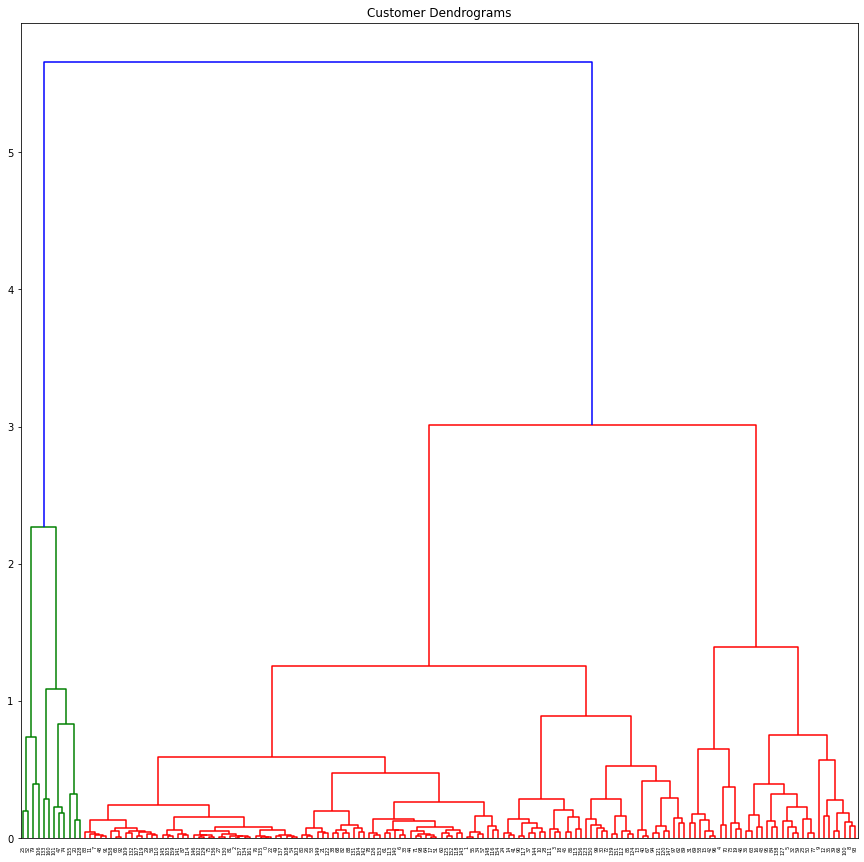

In [ ]:
plt.figure(figsize=(15, 15))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(baseSPEstados[columns], method='ward'))

In [ ]:
agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
agg_cluster.fit(baseSPEstados[columns])

AgglomerativeClustering(n_clusters=5)

In [ ]:
clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = { 'Ano': list(baseSPEstados.Ano), 'UF': baseSPEstados.UF, 'Região': baseSPEstados['Região'], 'cluster': clusters_h}
dataframe_clusters_h = pd.DataFrame(clusters_dict_h, columns = ['cluster','Ano', 'UF', 'Região'])

In [ ]:
dataframe_clusters_h

,cluster,Ano,UF,Região
0,0,2015,Acre,NORTE
1,0,2015,Alagoas,NORDESTE
2,0,2015,Amapá,NORTE
3,0,2015,Amazonas,NORTE
4,4,2015,Bahia,NORDESTE
...,...,...,...,...
157,0,2020,Roraima,NORTE
158,0,2020,Santa Catarina,SUL
159,0,2020,Sergipe,NORDESTE
160,1,2020,São Paulo,SUDESTE


In [ ]:
from sklearn import metrics
metrics.silhouette_score(baseSPEstados[columns], agg_cluster.labels_, metric='euclidean')

0.5414118997168986

In [ ]:
metrics.silhouette_score(baseSPEstados[columns], kmeans.labels_, metric='euclidean')

0.5501577746703735

K-Means:

Número de Cluster = 4  
Silhouette 0.5442693730431563 

Número de Cluster = 5  
Silhouette 0.5501577746703735

Hierárquico:

Número de Cluster = 4  
Silhouette 0.5489846251134068 

Número de Cluster = 6  
Silhouette = 0.39818585687396796

## **Importar para excel**

In [ ]:
dataframe_clusters_h.to_excel(r'C:\clusters_hierarquico.xlsx', index=False)
dataframe_clusters.to_excel(r'C:\clusters_kmeans.xlsx', index=False)

.

**Rascunhos**

In [ ]:
baseSPEstados = pd.DataFrame()

colunaAno = pd.Series([])
colunaUf = pd.Series([])
colunaOcorrencias = pd.Series([])

row = 0

for index, value in groupAnoUf.iteritems():
  colunaAno[row] = index[0]
  colunaUf[row] = index[1]
  colunaOcorrencias[row] = value
  row += 1

baseSPEstados['Ano'] = colunaAno
baseSPEstados['UF'] = colunaUf
baseSPEstados['Ocorrências'] = colunaOcorrencias

baseSPEstados = pd.DataFrame(baseSPEstados, columns=['UF', 'Ano', 'População', 'Ocorrências'])


In [ ]:
basePopulacao = pd.read_excel("/content/drive/MyDrive/MachineLearning_Files/serie_2015_2020_TCU.xls", sheet_name="Plan1")

basePopulacao.head(20)

In [ ]:
unidades = basePopulacao['Unidades da Federação']

for uf in unidades:
  baseSPEstado = baseSPEstados['UF'] == uf
  baseSPEstado = baseSPEstados[baseSPEstado]

  populacao = basePopulacao['Unidades da Federação'] == uf
  populacao = basePopulacao[populacao]

  

